# Math and Application of Multivariate Linear Regression Modelling

In the first part of this notebook I go through the exercise of creating functions to create matrices, 
transpose matrices, create an identity matrix, calculate the dot product, get the diagonal matrix and then run through the formula used to calculate coefficient regressions in multivariate statistical analysis. In the second part I go through an EDA process with a data file, and in
the third part use the formulas created from the linear algebra section to compute a regression model from scratch
and evaluate its performance.

### Linear Algebra

###### Create Functions

In [1]:
import numpy as np
from numpy import random

In [2]:
'''Function to create a matrix (n x k) where the probability and distribution of a variable is conditional on another
variable that follows a binomial distribution. This simulation of variables is used to populate an n x k matrix.'''
def create_matrix(rows, columns, normal_mean, normal_std):
    array_of_array_list = []
    for i in range(0,rows):
        array_list = []
        for i in range(0, columns):
            random_variable = random.binomial(1, .2)
            if random_variable == 1:
                x = random.normal(normal_mean, normal_std, size=1)
                array_list.append(x[0])
            else:
                x = random.normal(normal_mean/2, normal_std/2, 1)
                array_list.append(x[0])
        
        array_of_array_list.append(array_list)
    
    matrix = np.array(array_of_array_list)
    return matrix

In [3]:
#Create n x n identity matrix
def create_identity_matrix(rows, columns):
    array_of_array_list = []
    if rows == columns:
        array_of_list = [1] + (columns-1)*[0]
        array_of_array_list.append(array_of_list)
        
        for i in range(0, rows-1):
            array = [array_of_array_list[i][-1]] + array_of_array_list[i][:-1]
            array_of_array_list.append(array)
    else:
        raise Exception("Matrix Must be a of equal rows and columns")
        
    return array_of_array_list

In [4]:
#Create a function to transpose any n x k matrix
def transpose_matrix(matrix):
    
    list_of_transposed_list = []
    for i in range(0,len(matrix[0])):
        transposed_list = []
        for j in range(0,len(matrix)):
            transposed_number = matrix[j][i]
            transposed_list.append(transposed_number)
        
        list_of_transposed_list.append(transposed_list)
    
    transposed_matrix = np.array(list_of_transposed_list)
    
    return transposed_matrix

In [5]:
#Create a function to calculate the dot product between two matrices
def dot_product(matrix1, matrix2):
    multmatrix = []
    
    for i in range(0,len(matrix1)):
        row_list = []
        for j in range(0, len(matrix2[0])):            
            number = 0
            
            for h in range(0, len(matrix2)):
                number += matrix1[i][h] * matrix2[h][j]
            
            row_list.append(number)
            
        multmatrix.append(row_list)
    
    multmatrix = np.array(multmatrix)
        
    return multmatrix

In [6]:
def get_matrix_diagonal(matrix):
    diagonal_matrix = []
    column_index = 0
    
    for i in range(len(matrix)):
        diagonal_number = matrix[i][column_index]
        diagonal_matrix.append(diagonal_number)
        column_index += 1
    
    diagonal_matrix = np.array(diagonal_matrix)
    return diagonal_matrix

In [7]:
#Use the functions from above as well as numpy's inverse function to calculate regression coefficients
def regression_formula(x_matrix, y_matrix):  
    transposed_xmatrix = transpose_matrix(x_matrix)
    identity_matrix = create_identity_matrix(len(x_matrix), len(transposed_xmatrix[0]))
    
    coefficient_matrix = dot_product(dot_product(np.linalg.inv((dot_product(transpose_matrix(x_matrix), x_matrix))), transpose_matrix(x_matrix)), y_matrix)
    return coefficient_matrix 

In [8]:
def get_coefficient_std_errors(x_matrix, df, y_true, y_pred):
    
    inverted_matrix = np.linalg.inv(dot_product(transpose_matrix(x_matrix), x_matrix))
    
    diagonal_matrix = get_matrix_diagonal(inverted_matrix)
    mse = sum(((df[y_true] - df[y_pred]) ** 2))/len(df)
    std_error_matrix = np.sqrt(mse*diagonal_matrix)
    
    return std_error_matrix

###### Run Analysis

In [9]:
#Create x and y matrix
random.seed(0)
xmatrix = create_matrix(2, 2, 3, 8) 
ymatrix = create_matrix(2, 1, 3, 8) 
print(xmatrix)
print(ymatrix)

[[ 4.46636696  7.71165489]
 [-1.87089622 18.75939558]]
[[13.12894824]
 [-0.52350616]]


In [10]:
#Determinant for a two by two matrix
# determinant = (xmatrix[0][0]*xmatrix[1][1]) - ((xmatrix[0][1]*xmatrix[1][0]))
# determinant

In [11]:
#Find determinant and inverse using numpy
determinant = np.linalg.det(np.dot(xmatrix,np.transpose(xmatrix)))
print(f'determinant: {determinant}')

inverse_xmatrix = np.linalg.inv(np.dot(xmatrix,np.transpose(xmatrix)))
inverse_xmatrix

determinant: 9645.999740200505


array([[ 0.03684586, -0.01413123],
       [-0.01413123,  0.00823326]])

In [12]:
#Create identity matrix same length as xmatrix
identity_matrix = create_identity_matrix(len(xmatrix), len(transpose_matrix(xmatrix)[0]))
identity_matrix

[[1, 0], [0, 1]]

In [13]:
#Transpose a matrix and compare my created function to numpys built in one
transposed_xmatrix = transpose_matrix(xmatrix)
print(transposed_xmatrix)
print(np.transpose(xmatrix))

[[ 4.46636696 -1.87089622]
 [ 7.71165489 18.75939558]]
[[ 4.46636696 -1.87089622]
 [ 7.71165489 18.75939558]]


In [14]:
#take dot product of x and transposed x matrix and compare formula output to numpy's
print(dot_product(xmatrix, transpose_matrix(xmatrix)))
np.dot(xmatrix, transpose_matrix(xmatrix))

[[ 79.41805496 136.30987559]
 [136.30987559 355.41517529]]


array([[ 79.41805496, 136.30987559],
       [136.30987559, 355.41517529]])

In [15]:
#Use function to get matrix diagonal
diagonal_matrix = get_matrix_diagonal(xmatrix)
diagonal_matrix

array([ 4.46636696, 18.75939558])

In [16]:
#Compare function output to numpy's diagonal function
np.diag(xmatrix)

array([ 4.46636696, 18.75939558])

In [17]:
#Calculate simulated coefficients
coefficients_matrix = regression_formula(xmatrix, ymatrix)
coefficients_matrix

array([[2.54880265],
       [0.22628869]])

In [18]:
#Coefficient formula using numpy for comparison
np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(xmatrix),xmatrix)), np.transpose(xmatrix)), ymatrix)

array([[2.54880265],
       [0.22628869]])

### Exploratory Data Analysis

In [19]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

In [20]:
#Set chart background to seaborn and import dataset
sn.set()
data = pd.read_csv(r'C:\Users\nickp\Desktop\data science\baby weight\births.csv')
data.head()

,Plural,Sex,Mom Age,Weeks,Marital,Weight Gained,Smoke,BirthWeightOz,Low,Premie,MomRace
0,1,1,32,40,1,38,0,111,0,0,white
1,1,2,32,37,1,34,0,116,0,0,white
2,1,1,27,39,1,12,0,138,0,0,white
3,1,1,27,39,1,15,0,136,0,0,white
4,1,1,25,39,1,32,0,121,0,0,white


In [21]:
#Dictionaries for mapping
gender = {1: 'male',
       2: 'female'}

marital_status = {1: 'married',
                 2: 'not married'}

smoker = {1: 'yes',
         0: 'no'}

#premature defined as less than 36 weeks
premie = {0: 'no',
         1: 'yes'}

In [22]:
#lists for mapping dictionaries to new columns

numeric_to_categorical_dicts = [gender, marital_status, smoker, premie]
mapping_columns_list = ['Sex', 'Marital', 'Smoke', 'Premie']

#Zip above lists to run mapping of dictionaries
for a, b in zip(numeric_to_categorical_dicts, mapping_columns_list):
    data[b+'_category'] = data[b].map(a)

In [23]:
#Check data types
data.dtypes

Plural               int64
Sex                  int64
Mom Age              int64
Weeks                int64
Marital              int64
Weight Gained        int64
Smoke                int64
BirthWeightOz        int64
Low                  int64
Premie               int64
MomRace             object
Sex_category        object
Marital_category    object
Smoke_category      object
Premie_category     object
dtype: object

In [24]:
#check null values
data.isnull().sum()

Plural              0
Sex                 0
Mom Age             0
Weeks               0
Marital             0
Weight Gained       0
Smoke               0
BirthWeightOz       0
Low                 0
Premie              0
MomRace             0
Sex_category        0
Marital_category    0
Smoke_category      0
Premie_category     0
dtype: int64

In [25]:
#Check data shape
data.shape

(1409, 15)

In [26]:
#summary statistics
data.describe()

,Plural,Sex,Mom Age,Weeks,Marital,Weight Gained,Smoke,BirthWeightOz,Low,Premie
count,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.00000
mean,1.036196,1.488999,26.792761,38.649397,1.344925,30.589780,0.146203,116.440738,0.084457,0.12846
std,0.201475,0.500056,6.089151,2.654167,0.475513,13.875535,0.353435,22.125534,0.278171,0.33472
min,1.000000,1.000000,13.000000,22.000000,1.000000,0.000000,0.000000,12.000000,0.000000,0.00000
25%,1.000000,1.000000,22.000000,38.000000,1.000000,20.000000,0.000000,106.000000,0.000000,0.00000
50%,1.000000,1.000000,26.000000,39.000000,1.000000,30.000000,0.000000,118.000000,0.000000,0.00000
75%,1.000000,2.000000,31.000000,40.000000,2.000000,40.000000,0.000000,130.000000,0.000000,0.00000
max,3.000000,2.000000,43.000000,45.000000,2.000000,95.000000,1.000000,181.000000,1.000000,1.00000


In [27]:
#Run correlation metrics
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Plural,Sex,Mom Age,Weeks,Marital,Weight Gained,Smoke,BirthWeightOz,Low,Premie
Plural,1,-0.0066,0.08,-0.33,-0.034,0.094,-0.054,-0.34,0.38,0.3
Sex,-0.0066,1,0.019,0.051,-0.011,-0.0084,-0.007,-0.048,-0.027,-0.028
Mom Age,0.08,0.019,1,0.037,-0.47,0.01,-0.11,0.15,-0.071,-0.063
Weeks,-0.33,0.051,0.037,1,-0.064,0.06,-0.032,0.59,-0.53,-0.71
Marital,-0.034,-0.011,-0.47,-0.064,1,-0.031,0.16,-0.17,0.086,0.096
Weight Gained,0.094,-0.0084,0.01,0.06,-0.031,1,0.003,0.19,-0.1,-0.034
Smoke,-0.054,-0.007,-0.11,-0.032,0.16,0.003,1,-0.13,0.062,0.039
BirthWeightOz,-0.34,-0.048,0.15,0.59,-0.17,0.19,-0.13,1,-0.67,-0.5
Low,0.38,-0.027,-0.071,-0.53,0.086,-0.1,0.062,-0.67,1,0.5
Premie,0.3,-0.028,-0.063,-0.71,0.096,-0.034,0.039,-0.5,0.5,1


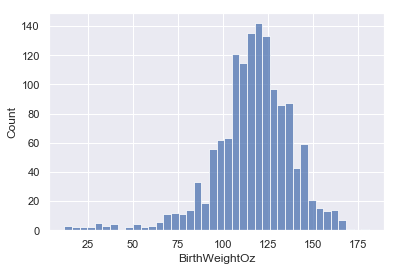

In [28]:
#Distribution plot of y variable
sn.histplot(data['BirthWeightOz'])

<Figure size 432x288 with 0 Axes>

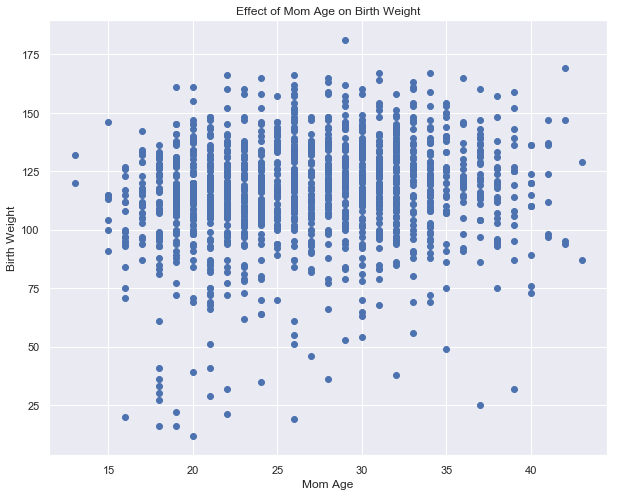

<Figure size 432x288 with 0 Axes>

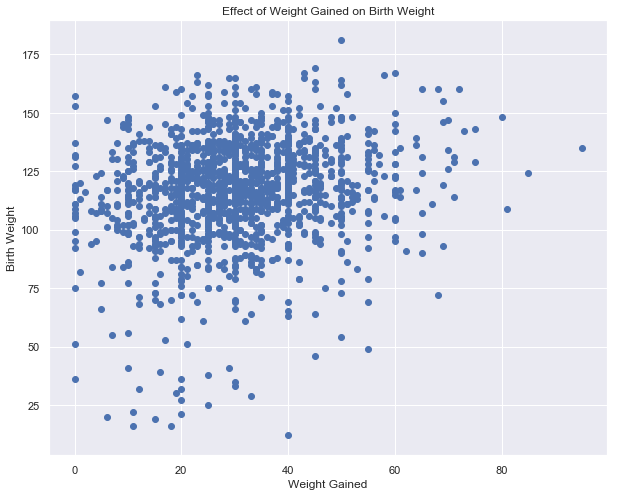

<Figure size 432x288 with 0 Axes>

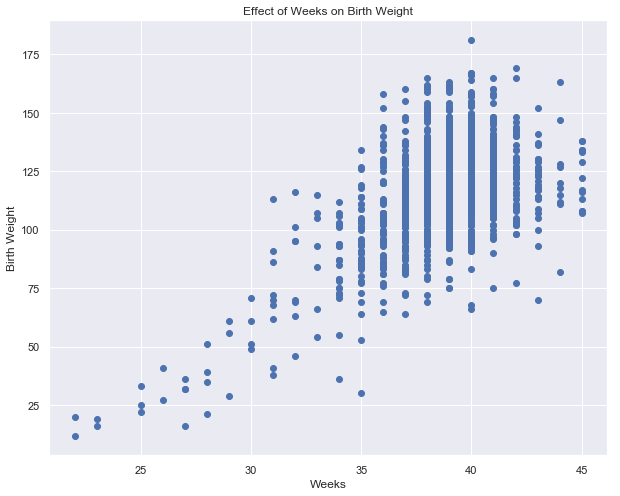

In [29]:
#Run scatter plots to see linear relationship between variables and birth weight and save all charts as a pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("scatterplots.pdf")

scatter_columns = ['Mom Age', 'Weight Gained', 'Weeks']

for i in scatter_columns:
    plot2 = plt.figure()
    plt.figure(figsize=(10,8))
    plt.title("Effect of {} on Birth Weight".format(i))
    plt.xlabel(i)
    plt.ylabel('Birth Weight')
    plt.scatter(data[i], data['BirthWeightOz'])
    pdf.savefig(plot2)
    
pdf.close()

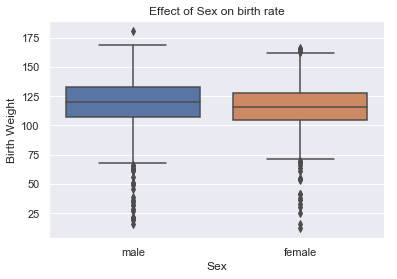

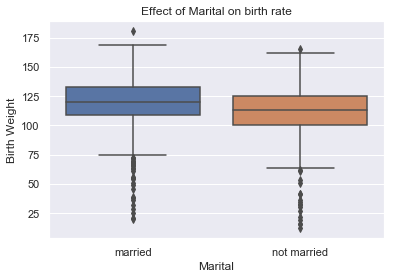

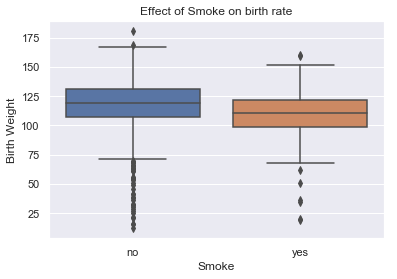

In [30]:
#Show boxplots of categorical columns
cat_columns = ['Sex_category','Marital_category', 'Smoke_category']
for i in cat_columns: 
    ax = sn.boxplot(x=i, y='BirthWeightOz', data=data)
    ax.set_title(f'Effect of {i.split("_", 1)[0]} on birth rate')
    ax.set_ylabel('Birth Weight')
    ax.set_xlabel(i.split("_", 1)[0])
    plt.show()

### Regression Modelling

##### Model Setup

In [31]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
#Create a function to create the input x and y data for the model
def create_x_y(df, x_columns, y_column, variable_drop_cat_dict):
    drop_columns = [key + '_' + value for key, value in variable_drop_cat_dict.items()]
    x = df.copy()
    x = x[x_columns]
    x = pd.get_dummies(x, columns=variable_drop_cat_dict.keys())
    
    x = x.drop(drop_columns, axis=1)
    x = sm.add_constant(x)
    
    y = df.copy()
    y = y[[y_column]]
    
    return x, y

In [33]:
#define function to get prediction -- need to exponentiate if logged
def get_predictions(coeffs, x_population):
    x_population['Id'] = np.arange(len(x_population))
    column_list = list(x_population.columns)
    column_list.remove('Id')
    x_df = pd.melt(x_population, id_vars=['Id'], value_vars=column_list)
    x_df = pd.merge(x_df, coeffs, left_on='variable', right_on = 'Variable', how='left')
    x_df['value'].fillna(0, inplace=True)
    
    x_df['Prediction Components'] = x_df['Coefficient']*x_df['value']
    predictions_df = x_df.groupby('Id')['Prediction Components'].sum().reset_index()
    predictions_df.rename(columns={'Prediction Components':'Prediction'}, inplace=True)
    predictions_df.drop('Id', axis=1, inplace=True)
    x_population.drop('Id', axis=1, inplace=True)
    return predictions_df

In [34]:
#create function to calculate r2 for any linear regression model
def get_r2(df, y_true, y_pred):
    df['Squared Differences'] = (df[y_true] - df[y_pred])**2
    
    ymean = df[y_true].mean()
    df['ymean'] = ymean
    
    df['Total Variability'] = (df[y_true] - df['ymean'])**2
    
    r2 = (df['Total Variability'].sum() - df['Squared Differences'].sum())/df['Total Variability'].sum()
    return r2

In [35]:
#Calculate metrics for Regression Model
def regression_metrics(df, y_true, y_pred): 
    mse = sum(((df[y_true] - df[y_pred]) ** 2))/len(df)
    rmse = np.sqrt(np.mean((df[y_true] - df[y_pred]) ** 2))
    r2 = get_r2(df, y_true, y_pred)
    mae = sum(abs(df[y_true] - df[y_pred]))/len(df)
    metrics_df = pd.DataFrame({'MSE': mse,
                               'RMSE': rmse,
                               'R2':r2,
                               'MAE':mae}, index=[1])
    
    return metrics_df

In [36]:
#Create Squared term for weeks
data['Weeks Squared'] = data['Weeks'] ** 2

In [37]:
#Lists for splitting data into x and y sets

x_variables = ['Sex_category', 'Marital_category', 'Smoke_category', 'Weeks', 'Weight Gained']
y_variable = 'BirthWeightOz'

cat_variable_dict_drop_categories = {'Sex_category': 'male',
                                     'Marital_category': 'not married',  
                                     'Smoke_category': 'no'}

#Run function to get x and y split
x, y = create_x_y(data, x_variables, y_variable, cat_variable_dict_drop_categories)

C:\Users\nickp\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


##### Run Models

In [38]:
#Use stats models to run regression
lr = sm.OLS(np.log(y), x)
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          BirthWeightOz   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     259.3
Date:                Wed, 20 Oct 2021   Prob (F-statistic):          1.86e-196
Time:                        20:44:24   Log-Likelihood:                 397.27
No. Observations:                1409   AIC:                            -782.5
Df Residuals:                    1403   BIC:                            -751.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.2431      0.072     31.313      0.000       2.103       2.384
Weeks                        0.0622      0.002     33.675      0.000       0.059       0.066
Weight Gained                0.0024      0.000      6.904      0.000       0.002       0.003
Sex_category_female         -0.0285      0.010     -2.920      0.004      -0.048      -0.009
Marital_category_married     0.0506      0.010      4.859      0.000       0.030       0.071
Smoke_category_yes          -0.0521      0.014     -3.729      0.000      -0.080      -0.025
==============================================================================
Omnibus:                      412.195   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1954.458
Skew:                          -1.299   Prob(JB):                         0.00
Kurtosis:                       8.152   Cond. No.                         738.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Calculate coefficients using linear algebra formulas from part 1

coefficients = regression_formula(x.values, np.log(y.values))
coefficients

array([[ 2.24312023],
       [ 0.06217591],
       [ 0.00243101],
       [-0.02850276],
       [ 0.05057729],
       [-0.05212645]])

In [40]:
#Do formula with numpy to compare
np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x.values),x.values)), np.transpose(x.values)), np.log(y.values))

array([[ 2.24312023],
       [ 0.06217591],
       [ 0.00243101],
       [-0.02850276],
       [ 0.05057729],
       [-0.05212645]])

In [41]:
#Create a coefficient dataframe
coeff_df = pd.DataFrame(coefficients, 
             columns=['Coefficient'])

variable_df = pd.DataFrame(x.columns, 
             columns=['Variable'])

coeff_df = coeff_df.merge(variable_df, how='inner', left_index=True, right_index=True)
coeff_df

,Coefficient,Variable
0,2.243120,const
1,0.062176,Weeks
2,0.002431,Weight Gained
3,-0.028503,Sex_category_female
4,0.050577,Marital_category_married
5,-0.052126,Smoke_category_yes


##### Get Predictions and evaluate performance

In [42]:
#Get Predictions from stats models
sm_pred = pd.DataFrame(model.predict(x))
sm_pred.head()

,0
0,4.873112
1,4.648358
2,4.747730
3,4.755023
4,4.796350


In [43]:
#run predictions using calculated coefficients and predictions function and compare to stats models output

predictions = get_predictions(coeff_df, x)
predictions.head()

,Prediction
0,4.873112
1,4.648358
2,4.747730
3,4.755023
4,4.796350


In [44]:
#Merge predictions onto original dataframe and log the original
data = pd.merge(data, predictions, left_index=True,right_index=True, how='inner')
data['LoggedBirthWeightActual'] = np.log(data['BirthWeightOz'])
data['Exponentiated Prediction'] = np.exp(data['Prediction'])

In [45]:
#Calculate Regression metrics
metrics = regression_metrics(data, 'LoggedBirthWeightActual','Prediction')
metrics

,MSE,RMSE,R2,MAE
1,0.033314,0.182521,0.480301,0.132708


In [46]:
#Run metrics using sklearn to compare
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print(f'MSE: {mean_squared_error(np.log(y), sm_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(np.log(y), sm_pred))}')
print(f'R2: {r2_score(np.log(y), sm_pred)}')
print(f'MAE: {mean_absolute_error(np.log(y), sm_pred)}')

MSE: 0.0333139991079202
RMSE: 0.18252122919792152
R2: 0.48030068190419584
MAE: 0.1327078694863806


In [47]:
#Get standard errors of coefficient and compare to oens from 
coeff_std_errors = pd.DataFrame(get_coefficient_std_errors(x.values, data, 'LoggedBirthWeightActual','Prediction'),
    columns=['Standard Error'])
coeff_std_errors

,Standard Error
0,0.071484
1,0.001842
2,0.000351
3,0.009741
4,0.010386
5,0.013947


In [48]:
#Merge standard error with coefficient dataframe and calculate test statistic for statistical significance
coeff_df = pd.merge(coeff_df, coeff_std_errors, left_index=True, right_index=True, how='inner')
coeff_df['T Statistic'] = coeff_df['Coefficient'] / coeff_df['Standard Error']
coeff_df

,Coefficient,Variable,Standard Error,T Statistic
0,2.243120,const,0.071484,31.379496
1,0.062176,Weeks,0.001842,33.746745
2,0.002431,Weight Gained,0.000351,6.918722
3,-0.028503,Sex_category_female,0.009741,-2.926031
4,0.050577,Marital_category_married,0.010386,4.869534
5,-0.052126,Smoke_category_yes,0.013947,-3.737373


In [49]:
#calculate vif scores using statsmodels
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,216.121208,const
1,1.010678,Weeks
2,1.004605,Weight Gained
3,1.002836,Sex_category_female
4,1.030947,Marital_category_married
5,1.027019,Smoke_category_yes


In [50]:
#Write Dataframes to excel
writer = pd.ExcelWriter(r'C:\Users\nickp\Desktop\data science\baby weight\baby weight regression output.xlsx')

coeff_df.to_excel(writer, "Coefficients", index=False)
data.to_excel(writer, "dataset with pred", index=False)
metrics.to_excel(writer, "metrics", index=False)

writer.save()